<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%208/Assignment_8_Trial_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install asgnmt8-0.0.1-py3-none-any.whl


## Updates in this trial

> Adding grayscale in transformation    
> Adding Random Crop    
> Changing Normalize parameters
Source : https://github.com/kuangliu/pytorch-cifar/issues/19

> Changing the learning rate to 0.01

In [2]:
from torchvision import transforms
from asgnmt8.DataLoader import cifar_data_loader,View_images
transform_params = dict()
transform_params['train'] = transforms.Compose([transforms.RandomHorizontalFlip(),
                                       transforms.Grayscale(num_output_channels=3), 
                                       transforms.RandomCrop(32, padding=4),  
                                       transforms.RandomRotation(10),  
                                       transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),  
                                       transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])

transform_params['test'] = transforms.Compose([# transforms.RandomHorizontalFlip(),
                                      #  transforms.Grayscale(num_output_channels=3), 
                                      #  transforms.RandomCrop(32, padding=4),  
                                      #  transforms.RandomRotation(10),  
                                      #  transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),  
                                      #  transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

trainloader,testloader = cifar_data_loader(transform_params,BatchSize=250)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import torch

from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

from asgnmt8.resnet import ResNet18
net = ResNet18().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [4]:
from asgnmt8.Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn

tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9,weight_decay = 0.00005)
#scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

for epoch in range(20):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
#    scheduler.step()
    acc = tt.test_(net, device, testloader)  
    
   
print('Finished Training')

  0%|          | 0/200 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.9788861274719238 Batch_id=199 Accuracy=18.47: 100%|██████████| 200/200 [01:09<00:00,  2.86it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -0.9640, Accuracy: 2624/10000 (26.24%)

EPOCH: 1


Loss=1.7315617799758911 Batch_id=199 Accuracy=34.63: 100%|██████████| 200/200 [01:13<00:00,  2.74it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -1.6221, Accuracy: 3668/10000 (36.68%)

EPOCH: 2


Loss=1.4510445594787598 Batch_id=199 Accuracy=43.55: 100%|██████████| 200/200 [01:13<00:00,  2.73it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -2.3725, Accuracy: 4397/10000 (43.97%)

EPOCH: 3


Loss=1.1700514554977417 Batch_id=199 Accuracy=52.13: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.1043, Accuracy: 5586/10000 (55.86%)

EPOCH: 4


Loss=1.2761305570602417 Batch_id=199 Accuracy=58.43: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.9998, Accuracy: 6313/10000 (63.13%)

EPOCH: 5


Loss=0.9679766893386841 Batch_id=199 Accuracy=61.97: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.5883, Accuracy: 6782/10000 (67.82%)

EPOCH: 6


Loss=0.9809165000915527 Batch_id=199 Accuracy=65.48: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.7346, Accuracy: 6953/10000 (69.53%)

EPOCH: 7


Loss=1.051498532295227 Batch_id=199 Accuracy=68.36: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.9000, Accuracy: 7367/10000 (73.67%)

EPOCH: 8


Loss=0.9210126996040344 Batch_id=199 Accuracy=70.67: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.1006, Accuracy: 7133/10000 (71.33%)

EPOCH: 9


Loss=0.7224614024162292 Batch_id=199 Accuracy=72.31: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.7294, Accuracy: 7713/10000 (77.13%)

EPOCH: 10


Loss=0.6687679886817932 Batch_id=199 Accuracy=73.62: 100%|██████████| 200/200 [01:13<00:00,  2.73it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.2204, Accuracy: 7456/10000 (74.56%)

EPOCH: 11


Loss=0.5424994230270386 Batch_id=199 Accuracy=75.09: 100%|██████████| 200/200 [01:13<00:00,  2.73it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.9612, Accuracy: 7635/10000 (76.35%)

EPOCH: 12


Loss=0.7577263116836548 Batch_id=199 Accuracy=75.72: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.9535, Accuracy: 7955/10000 (79.55%)

EPOCH: 13


Loss=0.6470361948013306 Batch_id=199 Accuracy=77.21: 100%|██████████| 200/200 [01:13<00:00,  2.73it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.6434, Accuracy: 8123/10000 (81.23%)

EPOCH: 14


Loss=0.733905553817749 Batch_id=199 Accuracy=77.95: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.9197, Accuracy: 7822/10000 (78.22%)

EPOCH: 15


Loss=0.613726019859314 Batch_id=199 Accuracy=78.78: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.6259, Accuracy: 8194/10000 (81.94%)

EPOCH: 16


Loss=0.5830986499786377 Batch_id=199 Accuracy=79.54: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -8.7610, Accuracy: 8243/10000 (82.43%)

EPOCH: 17


Loss=0.5444294214248657 Batch_id=199 Accuracy=80.21: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -8.0676, Accuracy: 8259/10000 (82.59%)

EPOCH: 18


Loss=0.6397517323493958 Batch_id=199 Accuracy=81.07: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -8.3553, Accuracy: 8303/10000 (83.03%)

EPOCH: 19


Loss=0.49758461117744446 Batch_id=199 Accuracy=81.35: 100%|██████████| 200/200 [01:13<00:00,  2.72it/s]



Test set: Average loss: -8.0340, Accuracy: 8129/10000 (81.29%)

Finished Training


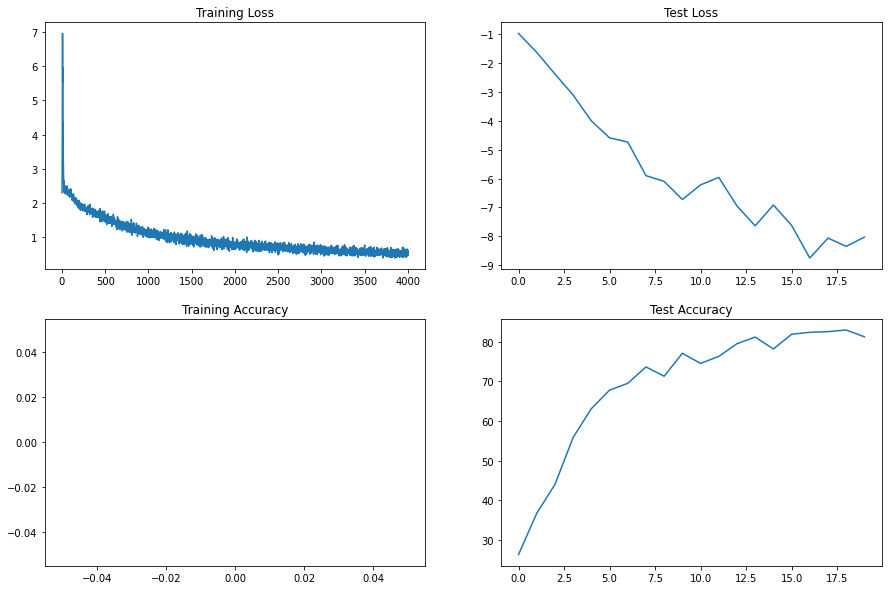

In [5]:
from asgnmt8.ModelPerformance import PlotTrainingGraphs,ViewModelPerformance

PlotTrainingGraphs(tt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship   car  ship
Accuracy of the network on the 10000 test images: 81 %
Accuracy of plane : 83 %
Accuracy of   car : 100 %
Accuracy of  bird : 85 %
Accuracy of   cat : 92 %
Accuracy of  deer : 66 %
Accuracy of   dog : 78 %
Accuracy of  frog : 88 %
Accuracy of horse : 62 %
Accuracy of  ship : 71 %
Accuracy of truck : 87 %


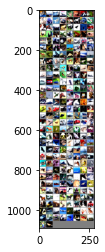

In [6]:
ViewModelPerformance(testloader,net,classes,device)